In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

raw_data = pd.read_csv("Covid Data.csv")
raw_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [3]:
# Data cleaning
data = raw_data.copy()

# Convert dates to datetimes
data.loc[data['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = np.nan
data['DATE_DIED'] = pd.to_datetime(data['DATE_DIED'], dayfirst=True)

# Fill in missing pregnancy data for males
female = data["SEX"] == 1
male = data["SEX"] == 2
data.loc[male, "PREGNANT"] = 2

# Indicate missing data in binary variables
binary_columns = [name for name in raw_data.columns.to_list() if name not in ['AGE', 'DATE_DIED', 'CLASSIFICATION_FINAL', 'MEDICAL_UNIT']]
data[binary_columns] = data[binary_columns].replace(99, 0).replace(97, 0) # We're using 0 to represent missing integer values
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,2020-05-03,<NA>,1,65,2,2,...,2,2,1,2,2,2,2,2,3,<NA>
1,2,1,2,1,2020-06-03,<NA>,1,72,2,2,...,2,2,1,2,2,1,1,2,5,<NA>
2,2,1,2,2,2020-06-09,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-06-12,<NA>,2,53,2,2,...,2,2,2,2,2,2,2,2,7,<NA>
4,2,1,2,1,2020-06-21,<NA>,2,68,2,1,...,2,2,1,2,2,2,2,2,3,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,<NA>,2,40,2,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048571,1,13,2,2,NaT,2,2,51,2,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,NaT,<NA>,2,55,2,2,...,2,2,2,2,2,2,2,2,7,<NA>
1048573,2,13,2,1,NaT,<NA>,2,28,2,2,...,2,2,2,2,2,2,2,2,7,<NA>


<Axes: xlabel='CLASSIFICATION_FINAL', ylabel='AGE'>

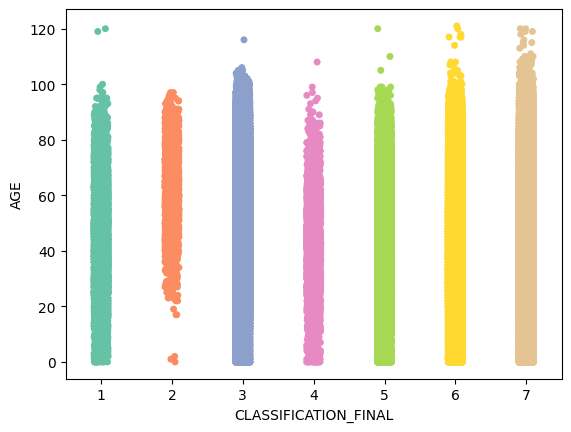

In [4]:
from sklearn.model_selection import train_test_split

y = data['CLASSIFICATION_FINAL'].copy()
X = data.drop('CLASSIFICATION_FINAL', axis=1)

# Data Plots
#figure, axes = plt.subplots(len(X.columns) // 5, 5)
#figure.set_size_inches(20,30)

# This treats axes as a 1D array, so we can iterate over it
#axes = axes.reshape(len(X.columns))

# TODO: should probably be using countplots for most of these
sb.stripplot(x="CLASSIFICATION_FINAL", y="AGE", data=data, jitter=True, legend=False, hue="CLASSIFICATION_FINAL", palette="Set2")

#for i, key in enumerate(X.drop("DATE_DIED", axis=1).columns):
#    sb.stripplot(x="CLASSIFICATION_FINAL", y=key, data=data, jitter=True, legend=False, ax=axes[i], hue="CLASSIFICATION_FINAL", palette="Set2")

<Axes: >

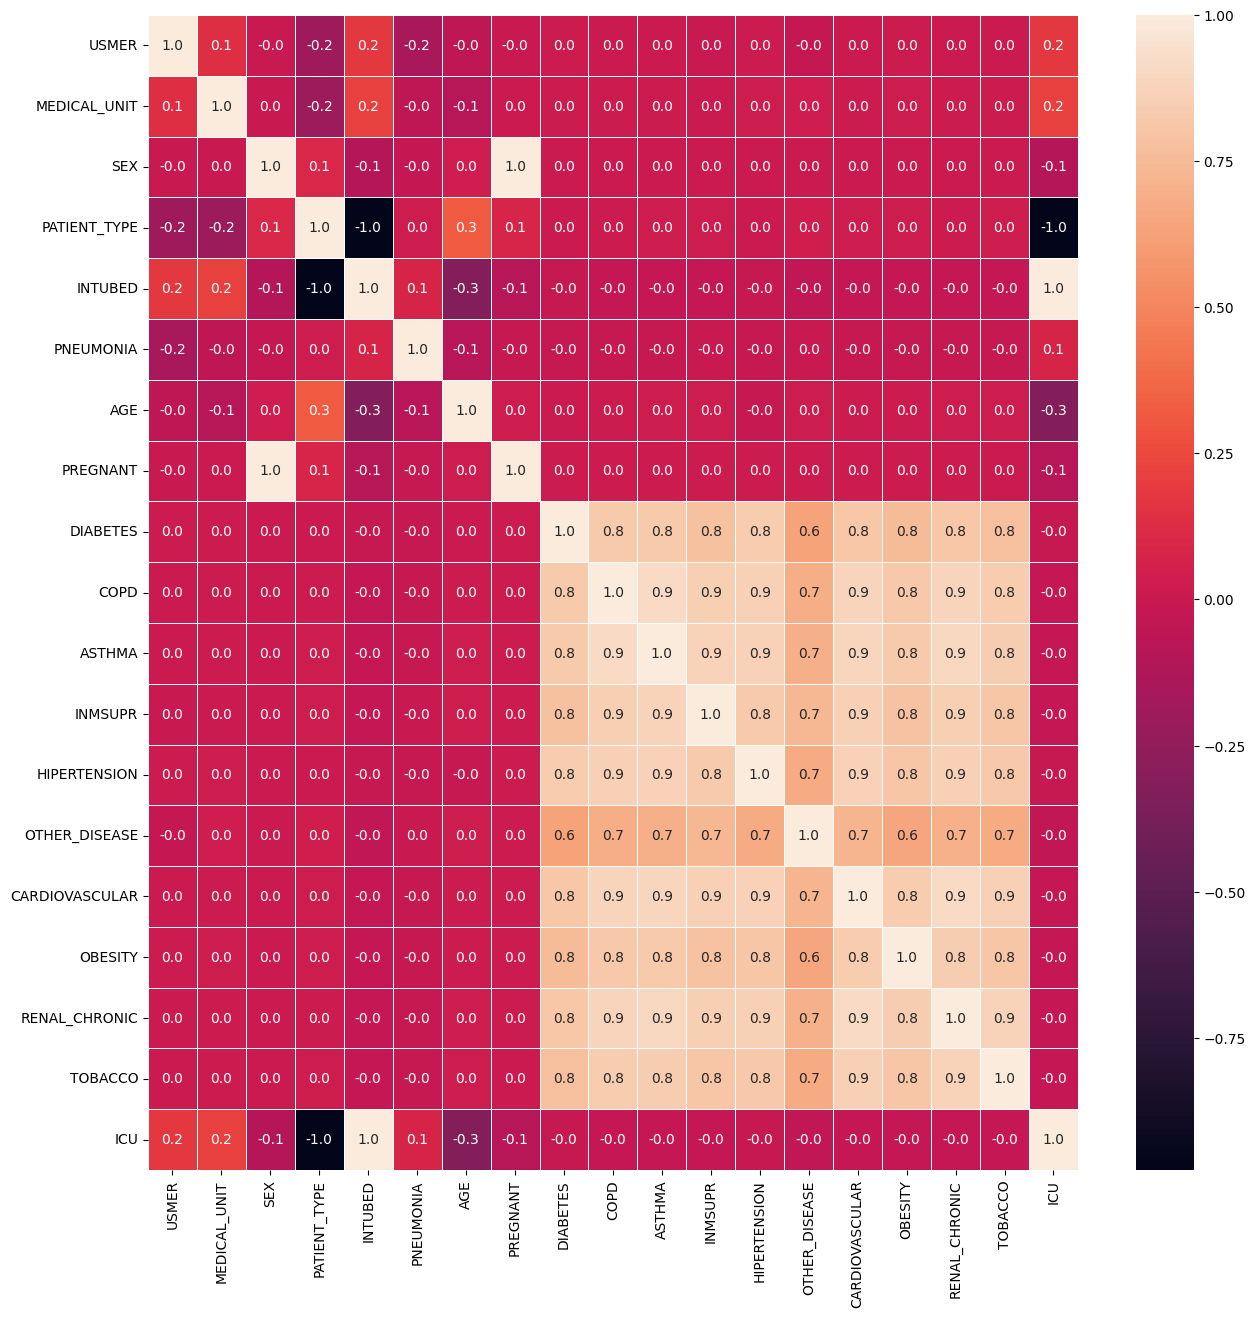

In [10]:
plt.figure(figsize=(15, 15))
sb.heatmap(pd.get_dummies(X.drop('DATE_DIED', axis=1)).corr(), annot=True, linewidth=.5, fmt='.1f')

In [6]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the data
scaled_X_train = sk.preprocessing.StandardScaler().fit_transform(X_train)
print("Mean:", scaled_X_train.mean()) # Mean is not exactly 0 due to floating point errors
print("Variance:", scaled_X_train.var()) # Variance is not exactly 1 due to floating point errors

ValueError: could not convert string to float: '9999-99-99'